# Lane Detection Experiment 1
Created on Thu Feb 25 21:51:33 2021

@author: Kevin Machado Gamboa

References:
    1. https://github.com/mvirgo/MLND-Capstone

##  Libraries

In [1]:
import os
import cv2 as cv
import numpy as np
import tensorflow as tf
#from scipy.misc import imresize
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

## Loading Images

In [2]:
im_folder = '../lane_dataset'
images = [cv.imread(os.path.join(im_folder, image)) for image in os.listdir(im_folder)]
im = images[:6]

## Loading TFLite model

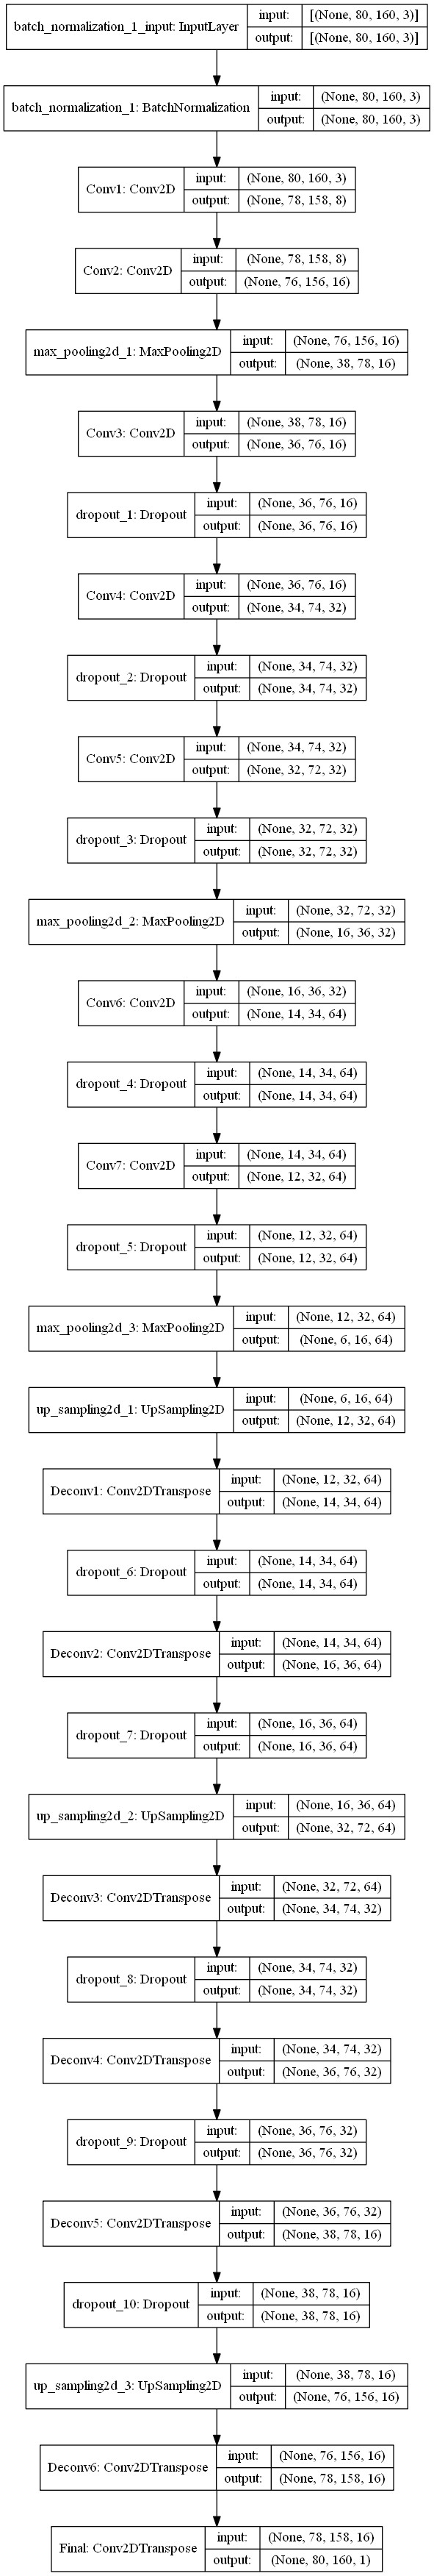

In [3]:
model = load_model('full_CNN_model.h5')
model_insize = model.input_shape
# --------------------------
# dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

## Model Predictions

In [4]:
k = []
for i in range(6):
    small_img = cv.resize(im[i], (80, 160))
    small_img = np.array(small_img)
    small_img = small_img[None, :, :, :]
    prediction = model.predict(small_img)[0] * 255
    
    pred = []
    pred.append(prediction)
    # Results pre-process
    kavg = np.mean(np.array([i for i in pred]), axis=0)
    # Generate fake R & B color dimensions, stack with G
    blanks = np.zeros_like(kavg).astype(np.uint8)
    # creates RGB image with prediction located in G
    lane_drawn = np.dstack((blanks, kavg, blanks))
    # Re-size to match the original image
    lane_image = cv.resize(np.uint8(lane_drawn), (1280, 720))

    # Merge the lane drawing onto the original image
    image = cv.addWeighted(im[i], 0.5, lane_image, 0.5, 0)
    k.append(image)

## Results

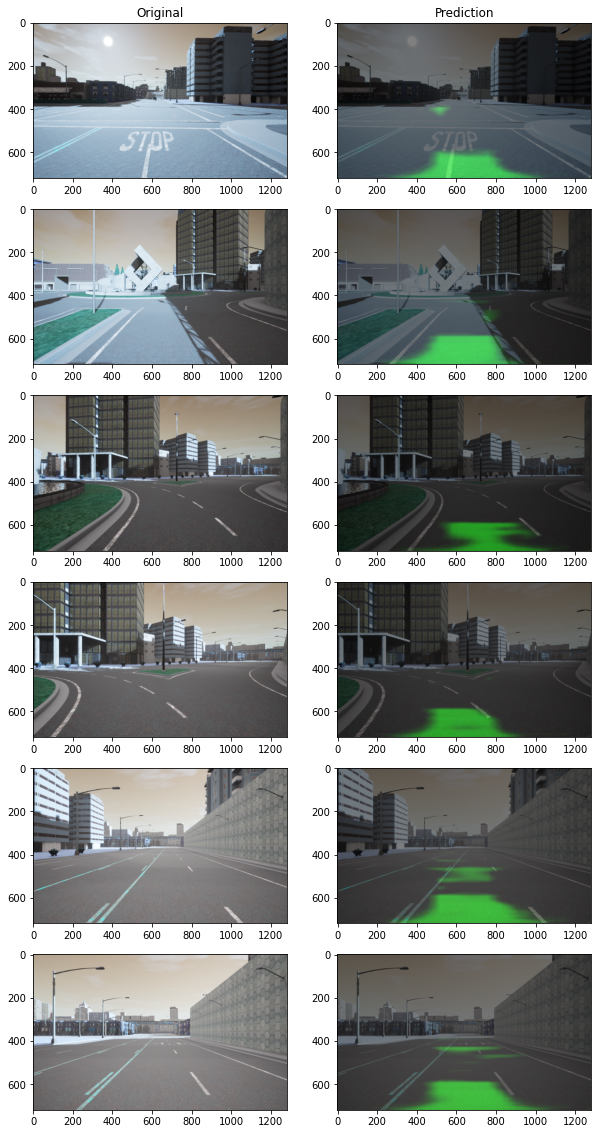

In [5]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10,20))
axes[0,0].set_title('Original')
for i in range(6):
    axes[i,0].imshow(im[i], aspect='auto')
    axes[i,1].imshow(k[i], aspect='auto')
    
axes[0,1].set_title('Prediction')
plt.show()